# Data management in the ocean, weather and climate sciences

> *If you use this lesson in a bootcamp or workshop, please let me know (irving.damien (at) gmail.com). 
I'd love to keep track of where it's being used so I can update and improve the content accordingly.*

Our previous lessons have shown us how to write programs that ingest a list of data files,
perform some calculations on those data,
and then print a final result to the screen. 
While this was a useful exercise in learning the principles of scripting and parsing the command line, 
in most cases the output of our programs will not be so simple. 
Instead, programs typically take data as input, 
manipulate that data, 
and then output yet more data. 
Over the course of a multi-year research project, 
most reseachers will write many different programs that produce many different output datasets. 

We want to:

* Develop a personal data management plan so as to avoid confusion/calamity  

Along the way, we will learn:

* how to create a Data Reference Syntax
* how to view the contents of binary files
* about data provenance and metadata
* about the Python libraries and command line utilities commonly used in the ocean, weather and climate sciences

Additional Python libraries that need be installed:

* `pip install gitpython`

## What's in a name?

In this lesson we are going to process some data collected by Australia's Integrated Marine Observing System ([IMOS](http://www.imos.org.au/)).

First off, let's load our data:

In [1]:
from netCDF4 import Dataset
acorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz'
acorn_DATA = Dataset(acorn_URL) 

The first thing to notice is the distinctive Data Reference Syntax (DRS) associated with the file. 
The staff at IMOS have archived the data according to the following directory structure:

`http://thredds.aodn.org.au/thredds/dodsC/<project>/<organisation>/<collection>/<facility>/<data-type>/<site-code>/<year>/`

From this we can deduce,
without even inspecting the contents of the file,
that we have data from the IMOS project that is run by the eMarine Information Infrastructure (eMII). 
It was collected in 2012 at the Turquoise Coast, Western Australia (TURQ) site of the Australian Coastal Ocean Radar Network (ACORN),
which is a network of high frequency radars that measure the ocean surface current
(see [this page](http://researchdata.ands.org.au/imos-acorn-turquoise-australia-australia/442676) 
on the Research Data Australia website for a nice overview of the dataset). 

The data type has a sub-DRS of its own, 
which tells us that the data represents the 1-hourly average surface current for a single month (October 2012), 
and that it is archived on a regularly spaced spatial grid and has not been quality controlled. 
The file is located in the "demos" directory, 
as it has been generated for the purpose of providing an example for users in the very helpful 
[Australian Ocean Data Network](http://portal.aodn.org.au/aodn/) (AODN) 
[user code library](https://github.com/aodn/imos-user-code-library).

Just in case the file gets separated from this informative directory stucture, 
much of the information is repeated in the file name itself, 
along with some more detailed information about the start and end time of the data, 
and the last time the file was modified.

`<project>_<facility>_V_<time-start>_<site-code>_FV00_<data-type>_<time-end>_<modified>.nc.gz`

In the first instance this level of detail seems like a bit of overkill, 
but consider the scope of the IMOS data archive. 
It is the final resting place for data collected by the entire national array of oceanographic observing equipment in Australia, 
which monitors the open oceans and coastal marine environment covering physical, chemical and biological variables. 
Since the data are so well labelled, 
locating all monthly timescale ACORN data from the Turquoise Coast and Rottnest Shelf sites 
(which represents hundreds of files) 
would be as simple as typing the following at the command line:      

`ls */ACORN/monthly_*/{TURQ,ROT}/*/*.nc` 

While it's unlikely that your research will ever involve cataloging data from such a large observational network, 
it's still a very good idea to develop your own personal DRS for the data you do have. 
This often involves investing some time at the beginning of a project to think carefully about the design of your directory and file name structures, 
as these can be very hard to change later on 
(a good example is [the DRS](http://cmip-pcmdi.llnl.gov/cmip5/docs/cmip5_data_reference_syntax.pdf) 
used by the Climate Model Intercomparison Project). 
The combination of bash shell wildcards and a well planned DRS is one of the easiest ways to make your research more efficient and reliable.   

### Challenge

We haven't even looked inside our IMOS data file and already we have the beginnings of a detailed data management plan. 
The first step in any research project should be to develop such a plan, 
so for this challenge we are going to turn back time. 
If you could start your current research project all over again, 
what would your data management plan look like? 
Things to consider include:  

* Data Reference Syntax
* How long it will take to obtain the data
* Storage and backup (here's a [post](http://drclimate.wordpress.com/2013/04/16/backing-up-your-work/) with some backup ideas)

Write down and discuss your plan with your partner.


## Binary file formats

We can guess from the `.nc` extension that we are dealing with a Network Common Data Form (netCDF) file. 
It's also compressed, hence the `.gz`. 
Had we actually downloaded the file to our computer and uncompressed it, 
our initial impulse might have been to type, 

    !cat IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc

but such a command would produce an incomprehensible mix symbols and letters. 
The reason is that up until now, 
we have been dealing with [text files](http://en.wikipedia.org/wiki/Text_file). 
These consist of a simple sequence of character data 
(represented using ASCII, Unicode, or some other standard) 
separated into lines, 
meaning that text files are human-readable when opened with a text editor or displayed using `cat`.

All other file types (including netCDF) are known collectively as [binary files](http://en.wikipedia.org/wiki/Binary_file). 
They tend to be smaller and faster for the computer to interpret than text files, 
but the payoff is that they aren't human-readable unless you have the right intpreter 
(e.g. `.doc` files aren't readable with your text editor and must instead be opened with Microsoft Word). 
To view the contents of a netCDF file we'd need to use a special command line utility called 
[`ncdump`](http://www.unidata.ucar.edu/software/netcdf/docs/netcdf/ncdump.html), 
which is included with the netCDF C software 
(i.e. if you're using any software that knows how to deal with netCDF - 
such as the Anaconda scientific Python distribution 
[used in Software Carpentry workshops](http://software-carpentry.org/v5/setup.html) -
then you probably have `ncdump` installed without even knowing it).   

For this example, however, we haven't actually downloaded the netCDF file to our machine. 
Instead, IMOS has made the data available via a THREDDS server, 
which means we can just pass a URL to the `netCDF4.Dataset` function in order to obtain the data. 

In [2]:
print(acorn_DATA)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    Conventions: IMOS version 1.3
    institution: Australian Coastal Ocean Radar Network (ACORN)
    title: IMOS ACORN Turquoise Coast site (WA) (TURQ), monthly aggregation of one hour averaged current data
    instrument: CODAR Ocean Sensors/SeaSonde
    site_code: TURQ, Turqoise Coast
    ssr_Stations: SeaBird (SBRD), Cervantes (CRVT)
    id: IMOS/ACORN/au/TURQ/2012-10-08T15:00:00Z.sea_state
    date_created: 2012-10-30T16:31:50Z
    abstract: These data have not been quality controlled. The ACORN facility is producing NetCDF files with radials data for each station every ten minutes.  Radials represent the surface sea water state component  along the radial direction from the receiver antenna  and are calculated from the shift of an area under  the bragg peaks in a Beam Power Spectrum.  The radial values have been calculated using soft

The great thing about netCDF files is that they contain [metadata](http://en.wikipedia.org/wiki/Metadata) - 
that is, data about the data. 
There are global attributes that give information about the file as a whole 
(shown above - we will come back to these later), 
while each variable also has its own attributes.

In [3]:
print('The file contains the following variables:')
print(acorn_DATA.variables.keys())

The file contains the following variables:
odict_keys(['LATITUDE', 'LONGITUDE', 'LATITUDE_quality_control', 'LONGITUDE_quality_control', 'TIME', 'SPEED', 'UCUR', 'VCUR', 'TIME_quality_control', 'SPEED_quality_control', 'UCUR_quality_control', 'VCUR_quality_control'])


(The 'u' means each variable name is represented by a Unicode string.) 

In [4]:
print('These are the attributes of the time axis:')
print(acorn_DATA.variables['TIME'])
print('These are some of the time values:')
print(acorn_DATA.variables['TIME'][0:10])

These are the attributes of the time axis:
<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    _FillValue: -9999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
unlimited dimensions: 
current shape = (493,)
filling off

These are some of the time values:
[ 22919.          22919.04166667  22919.08333333  22919.125       22919.16666667
  22919.20833333  22919.25        22919.29166667  22919.33333333  22919.375     ]


The raw time values are fairly meaningless, 
but we can use the time attributes to convert them to a more meaningful format...

In [5]:
from netCDF4 import num2date
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar

times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)
print(times[0:10])

[datetime.datetime(2012, 10, 1, 0, 0) datetime.datetime(2012, 10, 1, 1, 0)
 datetime.datetime(2012, 10, 1, 2, 0) datetime.datetime(2012, 10, 1, 3, 0)
 datetime.datetime(2012, 10, 1, 4, 0) datetime.datetime(2012, 10, 1, 5, 0)
 datetime.datetime(2012, 10, 1, 6, 0) datetime.datetime(2012, 10, 1, 7, 0)
 datetime.datetime(2012, 10, 1, 8, 0) datetime.datetime(2012, 10, 1, 9, 0)]


> ### Climate and Forecast (CF) metadata convention
>
> When performing simple data analysis tasks on netCDF files, 
command line tools like the Climate Data Operators 
([CDO](https://code.zmaw.de/projects/cdo)) 
are often a better alternative to writing your own functions in Python. 
However, let's put ourselves in the shoes of the developers of CDO for a minute. 
In order to calculate the time mean of a dataset for a given start and end date (for example), 
CDO must first identify the units of the time axis. 
This isn't as easy as you'd think, 
since the creator of the netCDF file could easily have called the `units` attribute `measure`, 
or `scale`, or something else completely unpredictable. 
They could also have defined the units as `weeks since 1-01-01 00:00:00` or `milliseconds after 1979-12-31`. 
Obviously what is needed is a standard method for defining netCDF attributes, 
and that’s where the [Climate and Forecast (CF) metadata convention](http://cf-pcmdi.llnl.gov/) comes in.

> The CF metadata standard was first defined back in the early 2000s and has now been adopted by all the major institutions and projects in the weather/climate sciences. 
There's a nice [blog post](http://drclimate.wordpress.com/2014/06/09/are-you-cf-compliant/) on the topic if you'd like more information, 
but for the most part you just need to be aware that if a tool like CDO isn't working, 
it might be because your netCDF file isn't CF compliant.

## Calculating the current speed

For the sake of example, 
let's say that our data file contained the zonal (east/west; 'UCUR') and meridional (north/south; 'VCUR') surface current components, 
but not the total current speed. 
To calculate it, 
we first need to assign a variable to the zonal and meridional current data. 

In [6]:
uData = acorn_DATA.variables['UCUR'][:,:,:]
vData = acorn_DATA.variables['VCUR'][:,:,:]

Both `uData` and `vData` are a special type of numpy array 
(which we have [met previously](http://www.software-carpentry.org/v5/novice/python/01-numpy.html)) 
known as a masked array, 
whereby some of the points in the time/latitude/longitude grid have missing (or masked) values. 
Just as with a normal numpy array, 
we can check the shape of our data 
(in fact, masked arrays can do everything normal numpy arrays can do and more).

In [7]:
print(type(uData))
print(uData.shape)

<class 'numpy.ma.core.MaskedArray'>
(493, 55, 57)


In other words, 493 time steps, 55 latitudes and 57 longitudes. 
We can now go ahead and calculate the current speed.

In [8]:
spData = (uData**2 + vData**2)**0.5

### Viewing the result

It's a good idea to regularly view your data throughout the code development process, 
just to ensure nothing that crazy has happened along the way. 
Below is a code except from 
[this example](https://github.com/aodn/imos-user-code-library/blob/master/Python/demos/acorn.py) 
in the AODN user code library, 
which simply plots one of the 493 timesteps.

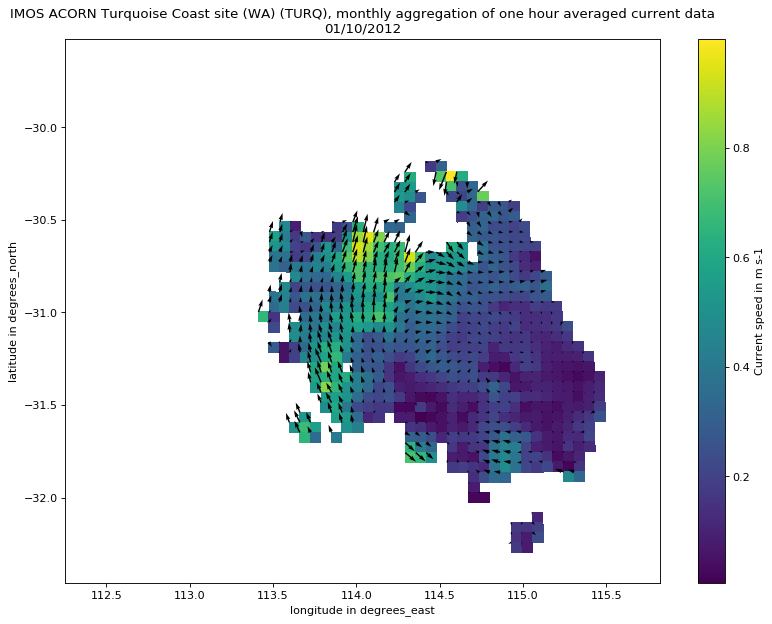

In [9]:
%matplotlib inline
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig

LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 4
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

figure1 = figure(figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData)
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)

title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

# plot velocity field
Q = quiver(lonData[:], latData[:], uData, vData, units='width')
show()
#savefig('surface_current.svg', bbox_inches='tight')

> ### Plotting options
>
> Quite a few lines of code were required to create our publication quality figure using [matplotlib](http://matplotlib.org/). 
Recognising this burden, 
the [Iris](http://scitools.org.uk/iris/) and [xarray](http://xarray.pydata.org/en/stable/index.html) libraries 
have been written specifically for analysing and plotting weather/climate/ocean data
(read: shorter, less complex code).
Both these libraries link easily with [Cartopy](http://scitools.org.uk/cartopy/), 
which offers a range of different map projections and the option of plotting coastlines.
>
> What if you want to view the contents of a netCDF file quickly, 
rather than go to the effort of producing something that is publication quality?
There are numerous tools out there for doing this, 
including [Panoply](http://www.giss.nasa.gov/tools/panoply/) 
and [UV-CDAT](http://uvcdat.llnl.gov/).

### Challenge

Let's say (hypothetically) that the TURQ site radar has been found to be unreliable for surface current speeds greater than 0.9 m/s.
To correct for this problem, 
the IMOS documentation suggests setting all values greater than 0.9 m/s, back to 0.9 m/s. 
The most obvious solution to this problem would be to loop through every element in `spData` and check its value:

    for t in range(0, len(TIME[:])):
        for y in range(0, len(LAT[:])):
            for x in range(0, len(LON[:])):
                if spData[t, y, x] > 0.9:
                    spData[t, y, x] = 0.9

The problem is that not only is this nested loop kind of ugly, it's also pretty slow. 
If our data array was even larger 
(e.g. like the huge data arrays that high resolution global climate models produce), 
then it would probably be prohibitively slow.
The reason is that *high level* languages like Python and Matlab are built for usability 
(i.e. they make it easy to write concise, readable code), not speed. 
To get around this problem, 
people have written Python libraries (like `numpy`) in *low level* languages like C and Fortran, 
which are built for speed (but definitely not usability). 
Fortunately we don't ever need to see the C code under the hood of the `numpy` library, 
but we should use it to [vectorise](http://en.wikipedia.org/wiki/Array_programming) our array operations whenever possible. 

With this in mind:

* Use the `numpy.ma.where()` function to correct all values in `spData` greater than 0.9 (hint: you'll need to `import numpy.ma`)
* Use the `%timeit` cell magic to compare the speed of your answer to the nested loop described above 

## Data provenance

Now that we've developed some code for reading in zonal and meridional surface current data and calculating the speed, 
the logical next step is to put that code in a script called `calc_current_speed.py` so that we can repeat the process quickly and easily.

The output of that script will be a new netCDF file containing the current speed data, 
however there's one more thing to consider before we go ahead and start creating new files. 
Looking closely at the global attributes of 
`IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc` 
you can see that the entire history of the file, 
all the way back to its initial download, 
has been recorded in the `history` attribute.

In [10]:
print(acorn_DATA.history)

2012-10-09T03:31:35 Convert totl_TURQ_2012_10_08_1500.tuv to netcdf format using CODAR_Convert_File.
2012-10-09T03:31:36 Write CODAR file totl_TURQ_2012_10_08_1500.tuv. Modification of the NetCDF format by eMII to visualise the data using ncWMS �
	 %


This practice of recording the history of the file ensures the [provenance](http://en.wikipedia.org/wiki/Provenance) of the data.
In other words, a complete record of everything that has been done to the data is stored with the data, 
which avoids any confusion in the event that the data is ever moved, 
passed around to different users,
or viewed by its creator many months later.  

If we want to create our own entry for the history attribute, 
we'll need to be able to create a: 

* Time stamp
* Record of what was entered at the command line in order to execute `calc_current_speed.py`
* Method of indicating which verion of the script was run (i.e. because the script is in our git repository)

### Time stamp

A library called `datetime` can be used to find out the time and date right now:

In [11]:
import datetime
 
time_stamp = datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
print(time_stamp)

2017-02-05T18:00:53


The `strftime` function can be used to customise the appearance of a datetime object;
in this case we've made it look just like the other time stamps in our data file.

### Command line record

In the Software Carpentry [lesson on command line programs](http://swcarpentry.github.io/python-novice-inflammation/10-cmdline/) we met `sys.argv`, 
which contains all the arguments entered by the user at the command line:

In [12]:
import sys
print(sys.argv)

['/Applications/anaconda/envs/default/lib/python3.5/site-packages/ipykernel/__main__.py', '-f', '/Users/irv033/Library/Jupyter/runtime/kernel-c5b2a29d-9991-412c-83a1-2e69528034a0.json']


In launching this IPython notebook,
you can see that a number of command line arguments were used. 
To join all these list elements up, 
we can use the `join` function that belongs to Python strings:

In [13]:
args = " ".join(sys.argv)
print(args)

/Applications/anaconda/envs/default/lib/python3.5/site-packages/ipykernel/__main__.py -f /Users/irv033/Library/Jupyter/runtime/kernel-c5b2a29d-9991-412c-83a1-2e69528034a0.json


While this list of arguments is very useful, 
it doesn't tell us which Python installation was used to execute those arguments. 
The `sys` library can help us out here too:

In [14]:
exe = sys.executable
print(exe) 

/Applications/anaconda/envs/default/bin/python


### Git hash

In the Software Carpentry [lessons on git](http://swcarpentry.github.io/git-novice/)
we learned that each commit is associated with a unique 40-character identifier known as a hash. 
We can use the git Python library to get the hash associated with the script:

In [15]:
from git import Repo
import os

git_hash = Repo(os.getcwd()).heads[0].commit
print(git_hash)

bec6077a7d8e6d5b0b9370ca9cca6a071ed62b32


We can now put all this information together for our history entry: 

In [16]:
entry = """%s: %s %s (Git hash: %s)""" %(time_stamp, exe, args, str(git_hash)[0:7])
print(entry)

2017-02-05T18:00:53: /Applications/anaconda/envs/default/bin/python /Applications/anaconda/envs/default/lib/python3.5/site-packages/ipykernel/__main__.py -f /Users/irv033/Library/Jupyter/runtime/kernel-c5b2a29d-9991-412c-83a1-2e69528034a0.json (Git hash: bec6077)


## Putting it all together

So far we've been experimenting in the IPython notebook to familiarise ourselves with `netCDF4` and the other Python libraries that might be useful for calculating the surface current speed.
We should now go ahead and write a script, 
so we can repeat the process with a single entry at the command line:  

In [17]:
!cat code/calc_current_speed.py

import os, sys, argparse
import datetime
from git import Repo
from netCDF4 import Dataset


def calc_speed(u, v):
    """Calculate the speed"""

    speed = (u**2 + v**2)**0.5

    return speed


def copy_dimensions(infile, outfile):
    """Copy the dimensions of the infile to the outfile"""
        
    for dimName, dimData in infile.dimensions.iteritems():
        outfile.createDimension(dimName, len(dimData))


def copy_variables(infile, outfile):
    """Create variables corresponding to the file dimensions 
    by copying from infile"""
            
    for var_name in ['TIME', 'LATITUDE', 'LONGITUDE']:
        varin = infile.variables[var_name]
        outVar = outfile.createVariable(var_name, varin.datatype, 
                                        varin.dimensions, 
                                        fill_value=varin._FillValue)
        outVar[:] = varin[:]
            
        var_atts = {}
        for att in varin.ncattrs():
            if not att == '_FillValue':
       

> ### Conserving metadata
>
> It took four separate functions in `calc_current_speed.py` to create the output file, 
because we had to copy the dimensions and most of the global and variable attributes from the original file to the new file. 
This is such a common problem that both the [Iris](http://scitools.org.uk/iris/) and [xarray](http://xarray.pydata.org/en/stable/index.html) libraries conserve metadata whenever possible. 
When xarray is used to read a netCDF file, for instance, 
the data are stored as an `xarray.DataArray` (as opposed to a `numpy.ndarray`).
These special data arrays carry their dimension information and variable atributes with them, 
which means you don't have to retrieve them manually. xarray and iris also come with a bunch of convenience functions for doing typical weather/climate/ocean tasks (calculating climatologies, anomalies, etc), which can be a pain using numpy. 

Using the help information that the `argparse` library provides, we can now go ahead and run this script at the command line:

In [18]:
!python code/calc_current_speed.py -h

usage: calc_current_speed.py [-h] infile uvar vvar outfile

Calculate the current speed

positional arguments:
  infile      Input file name
  uvar        Name of the zonal flow variable
  vvar        Name of the meridional flow variable
  outfile     Output file name

optional arguments:
  -h, --help  show this help message and exit

example:
  python calc_current_speed.py http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz UCUR VCUR IMOS_ACORN_SPCUR_20121001T000000Z_TURQ_monthly-1-hour-avg_END-20121029T180000Z.nc 

author:
  Damien Irving, irving.damien@gmail.com


In [20]:
!python code/calc_current_speed.py http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz UCUR VCUR IMOS_ACORN_SPCUR_20121001T000000Z_TURQ_monthly-1-hour-avg_END-20121029T180000Z.nc 

Input file:  http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz
Output file:  IMOS_ACORN_SPCUR_20121001T000000Z_TURQ_monthly-1-hour-avg_END-20121029T180000Z.nc


## The finished product

We can now inspect the attributes in our new file:

In [21]:
!ncdump -h IMOS_ACORN_SPCUR_20121001T000000Z_TURQ_monthly-1-hour-avg_END-20121029T180000Z.nc

netcdf IMOS_ACORN_SPCUR_20121001T000000Z_TURQ_monthly-1-hour-avg_END-20121029T180000Z {
dimensions:
	I = 55 ;
	J = 57 ;
	TIME = 493 ;
variables:
	double TIME(TIME) ;
		TIME:_FillValue = -9999. ;
		TIME:calendar = "gregorian" ;
		TIME:comment = "Given time lays at the middle of the averaging time period." ;
		TIME:long_name = "time" ;
		TIME:axis = "T" ;
		TIME:units = "days since 1950-01-01 00:00:00" ;
		TIME:standard_name = "time" ;
		TIME:local_time_zone = 8. ;
		TIME:valid_min = 0. ;
		TIME:valid_max = 999999. ;
	double LATITUDE(I, J) ;
		LATITUDE:_FillValue = 9999. ;
		LATITUDE:long_name = "latitude" ;
		LATITUDE:axis = "Y" ;
		LATITUDE:units = "degrees_north" ;
		LATITUDE:reference_datum = "geographical coordinates, WGS84 projection" ;
		LATITUDE:standard_name = "latitude" ;
		LATITUDE:valid_min = -90. ;
		LATITUDE:valid_max = 90. ;
	double LONGITUDE(I, J) ;
		LONGITUDE:_FillValue = 9999. ;
		LONGITUDE:long_name = "longitude" ;
		LONGITUDE:axis = "X" ;
		LONGITUDE:units = "degrees

There are a lot of global and variable attributes in our output file, 
because we copied everything from the input file. 
It might be tempting to edit `calc_current_speed.py` or use the `ncatted` command line utility 
(which, like `ncdump`, comes with the [NCO](http://nco.sourceforge.net/) install) 
to start cleaning up (i.e. delete) some of these attributes, 
but we should resist that urge. 
The `id` global attribute, for instance, makes little sense to anyone who doesn't work at IMOS. 
While this might seem like a reasonable argument for deleting that attribute, 
once an attribute is deleted it's gone forever. 
The `id` attribute is taking up a negligible amount of memory, 
so why not just leave it there just in case?
When in doubt, keep metadata.

### Challenge

Does your data management plan from the first challenge adequately address this issue of data provenance? 
If not, go ahead and add to your plan now. 
Things to consider include:

* How to capture and store metadata relating to output files that aren't self describing (i.e. unlike `.nc` files, formats like `.csv` or `.png` don't store things like global and variable attributes within them) 

Discuss the additions you've made to your plan with your partner.